# Getting Familair With Data


In [2]:
#Importing all libraries required
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing data into a dataframe loan_DF
loan_DF = pd.read_csv("loan.csv")

In [4]:
#Checking loan_DF and its content type
loan_DF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan_DF.shape
loan_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
#Validate the DataTypes of loan_DF
loan_DF.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

# Data Cleaning

In [7]:
loan_DF.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

There are columns with all values as null. Better to remove them as they bring no value [pun intended :)]

In [8]:
loan_DF.dropna(how = 'all', inplace = True,axis = 1)
loan_DF.shape
# Out of 111, 44 of them dropped. 

(39717, 57)

In [9]:
#Cheking further for columns having 
loan_DF.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Dropping columnns listed below on excel analysis. Below rows has values does not varies much and dont think will provide much insights
for eg. tax_liens is either 0 or NA
pub_rec_bankruptcies has values 0,1,2 or NA in which 0 and NA is around 38k out of 39k values
Applicationtype is Individual for all records

In [10]:
loan_DF.drop(['tax_liens', 'pub_rec_bankruptcies','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'policy_code', 'collections_12_mths_ex_med','initial_list_status','pymnt_plan'], axis = 1, inplace = True)
loan_DF.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16


Dropping Personal data related to customer irrelevent while making a loan approval decision.
id, member_id, emp_title,url,desc, title, zip_code

In [11]:
loan_DF.drop(['id', 'member_id','emp_title','url','desc', 'title', 'zip_code'], axis = 1, inplace = True)
loan_DF.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16


In [12]:
#Dropping data columns ssems to related to ongoing loan and hence does not helps here.
loan_DF.drop(["last_credit_pull_d", "addr_state","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [13]:
loan_DF.head()


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


Columns seems pretty good for analysis.
Now we proceed with rows validation.

In [14]:
# To validate how many rows have all missing values
loan_DF.isnull().all(axis=1).sum()

0

As per problem statement we have to do analysis if an applicant will default or not. 
Hence ongoing loan cutomers does not qualify. We will delete all rows with loan status is current.

In [15]:
#before dropping current status
loan_DF.shape

(39717, 21)

In [16]:
loan_DF = loan_DF[loan_DF.loan_status != "Current"]
loan_DF.shape

(38577, 21)

In [17]:
#Find Columns having values missing.
loan_DF.isna().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

emp_lenght and revol_util  havve misisng values and we need to replace them with appropriate values or drop them.

In [18]:
loan_DF.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_DF.shape

(38527, 21)

In [19]:
loan_DF.dropna(axis = 0, subset = ['emp_length'] , inplace = True)
loan_DF.shape

(37497, 21)

In [20]:
#re-evaluating Columns having values missing.
loan_DF.isna().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
dtype: int64

Now none of our columns have null value.

# Standardizing the Data

Review all columns having inappropriate values

In [22]:
loan_DF.to_excel('output.xlsx', index=False)

In [25]:
loan_DF.dtypes

loan_amnt                int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util              object
total_acc                int64
dtype: object

Columns having special characters int_rate,emp length and revol_util. We will remove them and convert columns to int type

In [26]:
loan_DF.int_rate = pd.to_numeric(loan_DF.int_rate.apply(lambda x : x.split('%')[0]))

In [27]:
loan_DF.emp_length = pd.to_numeric(loan_DF.emp_length.apply(lambda x: 1 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [28]:
loan_DF.revol_util = pd.to_numeric(loan_DF.revol_util.apply(lambda x : x.split('%')[0]))

In [29]:
loan_DF.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


In [30]:
#Checking further if any other columns needs to be chnaged to numeric
loan_DF.dtypes

loan_amnt                int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length               int64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util             float64
total_acc                int64
dtype: object

Looks good at this point.

# Deriving new columns

One column that can always be used is date/time i.e issue_d in this dataset.

In [31]:
loan_DF.issue_d = pd.to_datetime(loan_DF.issue_d, format='%b-%y')
loan_DF['year']=loan_DF['issue_d'].dt.year
loan_DF['month']=loan_DF['issue_d'].dt.month

In [32]:
#we have two new columns year and month
loan_DF.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,year,month
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,credit_card,27.65,Jan-85,1,3,0,83.7,9,2011,12
1,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,...,car,1.00,Apr-99,5,3,0,9.4,4,2011,12
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,small_business,8.72,Nov-01,2,2,0,98.5,10,2011,12
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,other,20.00,Feb-96,1,10,0,21.0,37,2011,12
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,wedding,11.20,Nov-04,3,9,0,28.3,12,2011,12


Outlier Treatments

<Axes: >

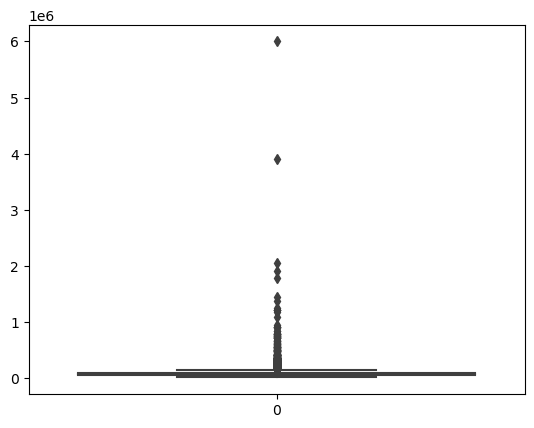

In [36]:
loan_DF.annual_inc = pd.to_numeric(loan_DF.annual_inc)
sns.boxplot(loan_DF['annual_inc'])


In [37]:
quantile_info = loan_DF.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     60000.00
0.75     83000.00
0.90    116714.40
0.95    142000.00
0.97    166307.32
0.98    189996.00
0.99    235000.00
Name: annual_inc, dtype: float64

In [39]:
per_95_annual_inc = loan_DF['annual_inc'].quantile(0.95)
loan_DF = loan_DF[loan_DF.annual_inc <= per_95_annual_inc]

<Axes: >

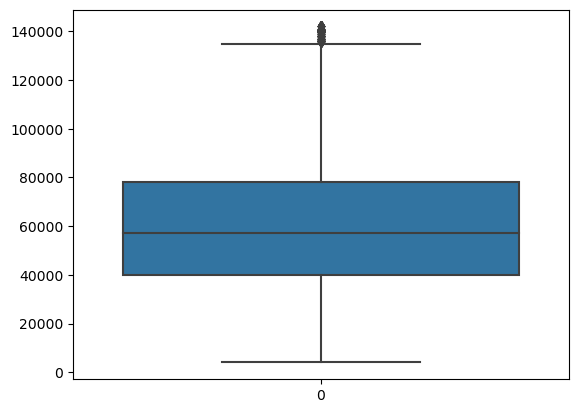

In [40]:
sns.boxplot(loan_DF.annual_inc)

<Axes: >

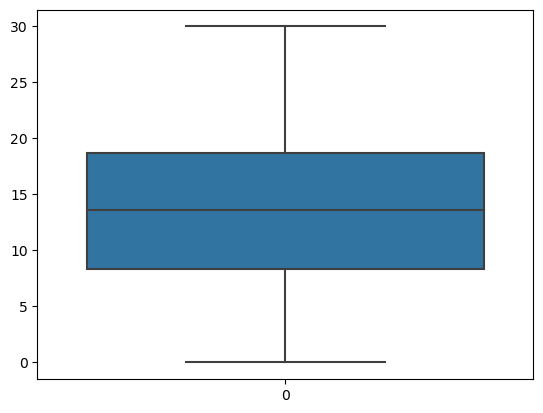

In [42]:
sns.boxplot(loan_DF.dti)

<Axes: >

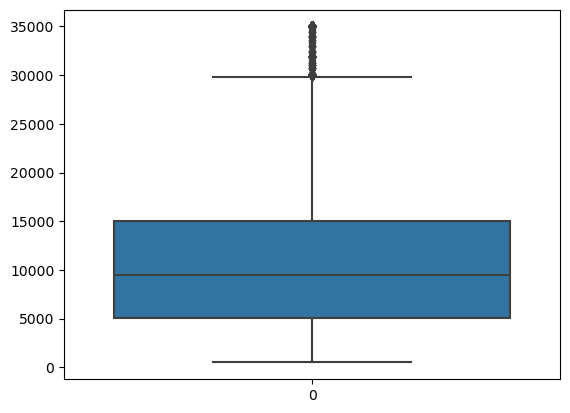

In [44]:
sns.boxplot(loan_DF.loan_amnt)

In [46]:
loan_DF.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8447.730677
0.750    13750.000000
0.900    19775.000000
0.950    23966.793726
0.970    24975.000000
0.975    25481.875000
0.980    27975.000000
0.985    29950.000000
0.990    31992.750000
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

# Visualizing Categorical Data

<Axes: xlabel='loan_status', ylabel='count'>

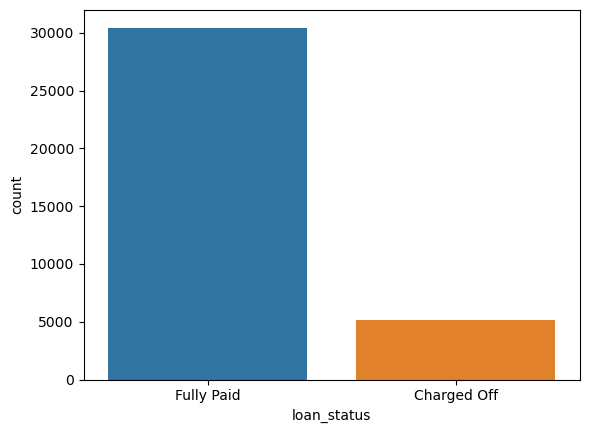

In [48]:
sns.countplot(x = 'loan_status', data = loan_DF)

In [49]:
loan_DF.sub_grade = pd.to_numeric(loan_DF.sub_grade.apply(lambda x : x[-1]))
loan_DF.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

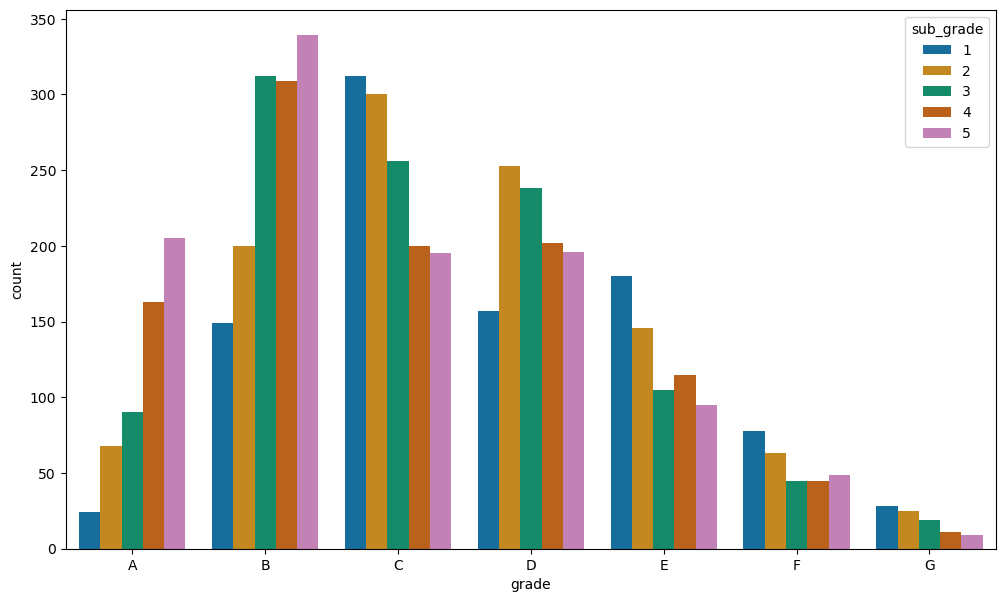

In [50]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_DF[loan_DF.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

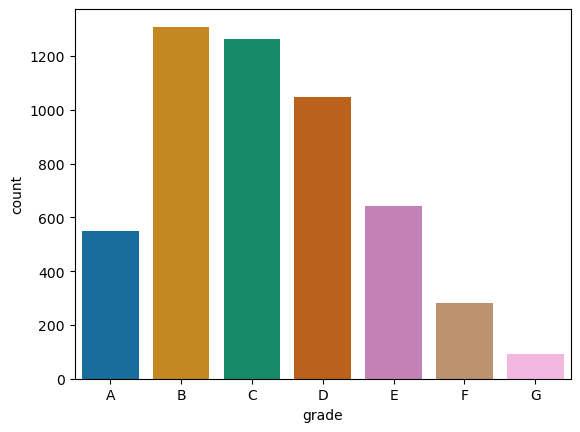

In [51]:
sns.countplot(x = 'grade', data = loan_DF[loan_DF.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])